In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
daily = pd.read_csv(
    "../data/raw/sp500_daily.csv",
    index_col=0,
    parse_dates=True
)

weekly = pd.read_csv(
    "../data/raw/sp500_weekly.csv",
    index_col=0,
    parse_dates=True
)


In [15]:
daily["sp500_ret"] = np.log(daily["SP500_Close"] / daily["SP500_Close"].shift(1))
weekly["sp500_ret"] = np.log(weekly["SP500_Close"] / weekly["SP500_Close"].shift(1))


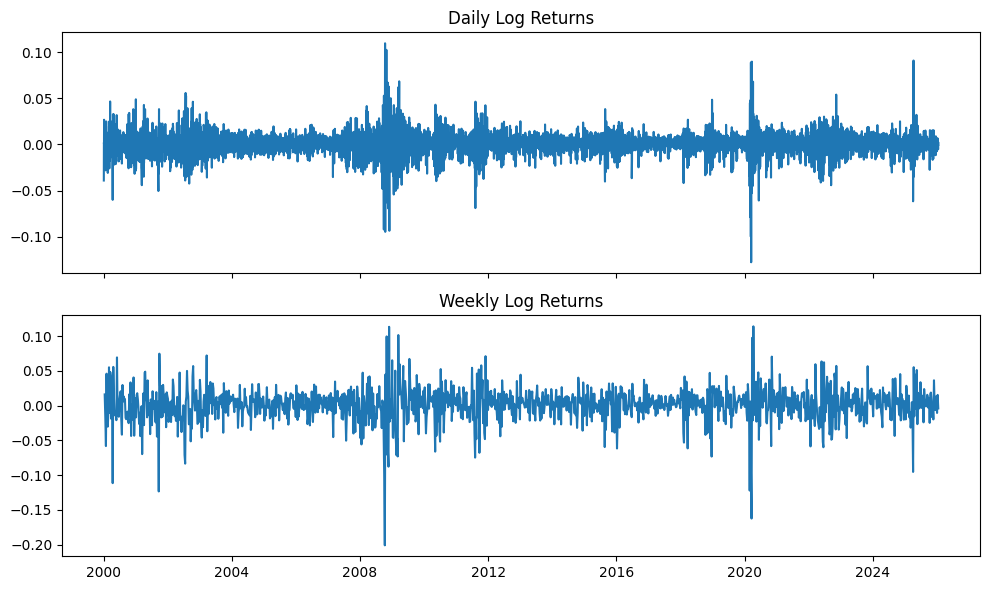

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=True)

axes[0].plot(daily["sp500_ret"])
axes[0].set_title("Daily Log Returns")

axes[1].plot(weekly["sp500_ret"])
axes[1].set_title("Weekly Log Returns")

plt.tight_layout()
plt.show()


In [17]:
daily["sp500_vol"] = daily["sp500_ret"].rolling(21).std()
weekly["sp500_vol"] = weekly["sp500_ret"].rolling(12).std()


In [18]:
daily["vix_ret"] = np.log(daily["VIX_Close"] / daily["VIX_Close"].shift(1))
weekly["vix_ret"] = np.log(weekly["VIX_Close"] / weekly["VIX_Close"].shift(1))


In [19]:
daily["vix_level"] = daily["VIX_Close"].rolling(21).mean()
weekly["vix_level"] = weekly["VIX_Close"].rolling(12).mean()


In [20]:
daily["trend"] = daily["sp500_ret"].rolling(21).mean()
weekly["trend"] = weekly["sp500_ret"].rolling(12).mean()


In [21]:
features = [
    "sp500_ret",
    "sp500_vol",
    "trend",
    "vix_ret",
    "vix_level"
]

daily_feat = daily[features].dropna()
weekly_feat = weekly[features].dropna()


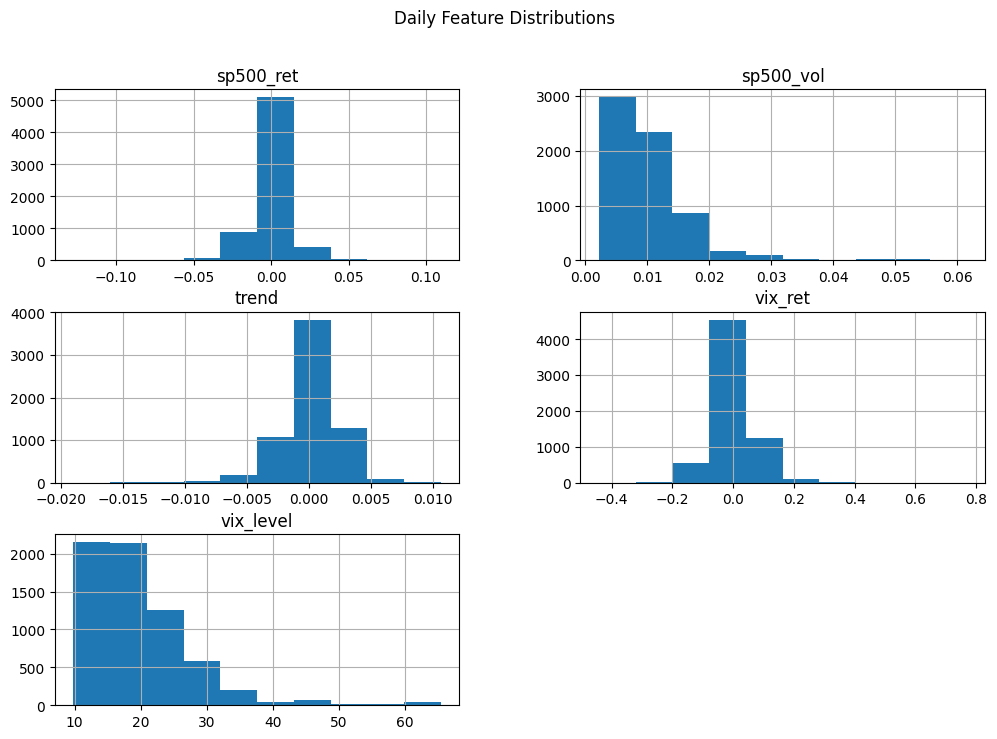

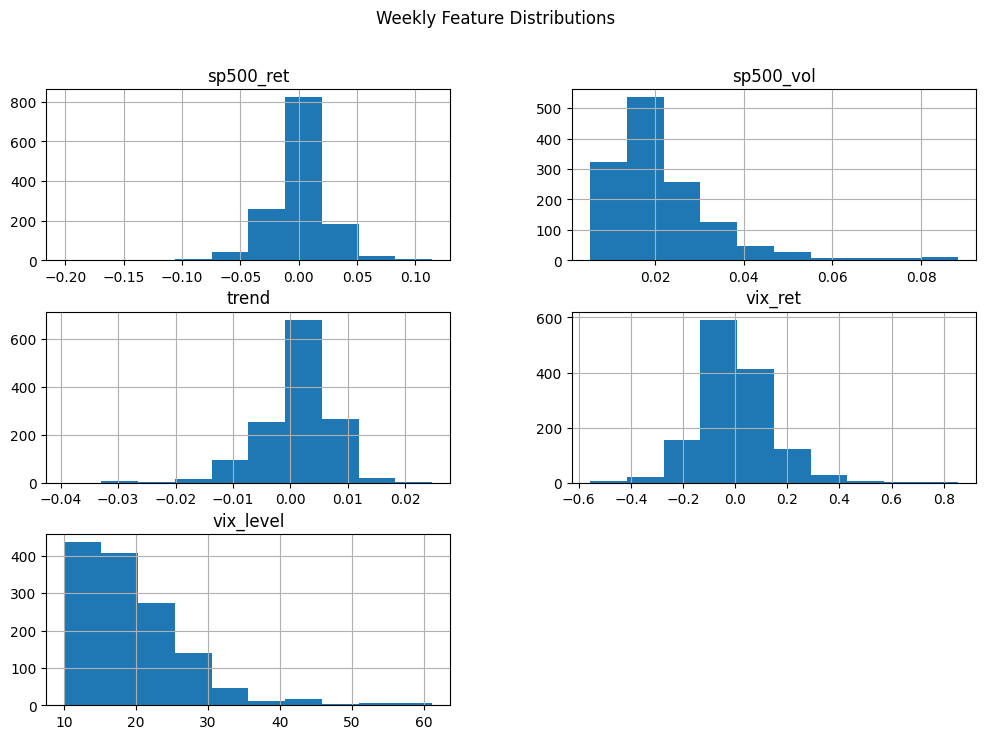

In [22]:
daily_feat.hist(figsize=(12,8))
plt.suptitle("Daily Feature Distributions")
plt.show()

weekly_feat.hist(figsize=(12,8))
plt.suptitle("Weekly Feature Distributions")
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler

scaler_daily = StandardScaler()
scaler_weekly = StandardScaler()

daily_scaled = pd.DataFrame(
    scaler_daily.fit_transform(daily_feat),
    index=daily_feat.index,
    columns=daily_feat.columns
)

weekly_scaled = pd.DataFrame(
    scaler_weekly.fit_transform(weekly_feat),
    index=weekly_feat.index,
    columns=weekly_feat.columns
)


In [24]:
daily_scaled.to_csv("../data/raw/features_daily.csv")
weekly_scaled.to_csv("../data/raw/features_weekly.csv")
